<a href="https://colab.research.google.com/github/ElianeSantosti/Regress-o-Linear-Simples-com-Sklearn/blob/main/Regress%C3%A3o_Linear_Simples_com_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_excel("/content/C├│pia de aprovacao_alunos.xlsx")
df.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [4]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [5]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<Axes: xlabel='ano_2015', ylabel='Count'>

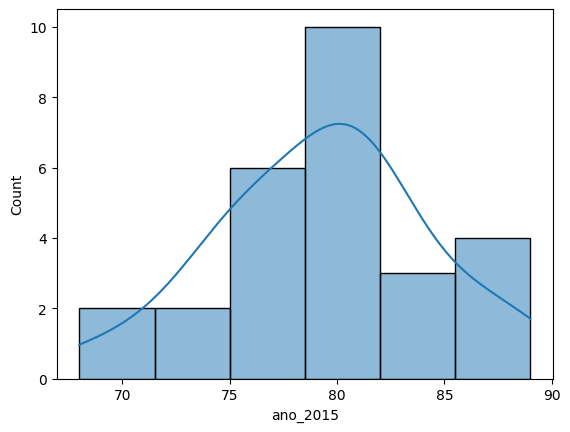

In [9]:
sns.histplot(data=df, x="ano_2015", kde=True)  #entendendo   as  variaveis

<Axes: xlabel='ano_2016', ylabel='Count'>

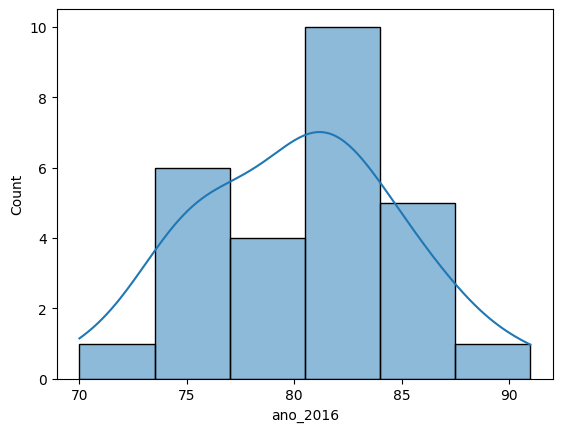

In [10]:
sns.histplot(data=df, x="ano_2016", kde=True)   #entendendo  as  variaveis

In [11]:
df.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


<Axes: xlabel='ano_2015', ylabel='ano_2016'>

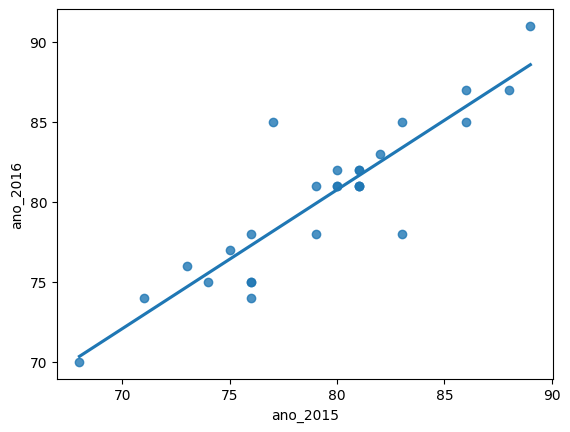

In [12]:
sns.regplot(x = "ano_2015",
            y = "ano_2016",
            ci = None,
            data = df) # analise  bivariável

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

alunos_norm = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

In [27]:
alunos_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [28]:
import statsmodels.formula.api as smf

function = "ano_2016~ano_2015-1"
model = smf.ols(formula=function, data=alunos_norm).fit()
print(model.summary())     #    análise de regressão linear simples utilizando o modelo de mínimos quadrados ordinários (OLS)


                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    2.21e-20
Time:                        19:46:35   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
x = alunos_norm[["ano_2015"]]

y = alunos_norm[["ano_2016"]]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

lr = LinearRegression()

lr.fit(x_train, y_train)   #   dividindo os dados em conjuntos de treinamento e teste

LinearRegression()

In [31]:
r_sq = lr.score(x_train, y_train)
r_sq    #    calcular o coeficiente de determinação (R-quadrado) de um modelo de regressão linear ajustado nos dados de treinamento. O coeficiente de determinação é uma métrica que fornece informações sobre a variação na variável

0.8800910056640281

In [32]:
y_pred_train = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))   # calcula diversas métricas de avaliação para um modelo de regressão linear  conjuntos de dados  de  treinamento

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


In [33]:
y_pred_test = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))    ## calcula diversas métricas de avaliação para um modelo de regressão linear  conjuntos de dados  de  teste

MAE: 0.10156392395533688
MSE: 0.02234792217796548
RMSE: 0.14949221443929941


 Quando os valores das análises de avaliação, como MAE, MSE e RMSE, são diferentes entre o conjunto de treinamento e o conjunto de teste, eles podem indicar como o modelo se comporta em diferentes situações. Aqui há algumas interpretações comuns: 1. Diferenças no conjunto de treinamento e teste: - Se o valor de uma métrica for muito melhor no conjunto de treinamento do que no conjunto de teste, poderá ser um sinal de sobreajuste (overfitting). O modelo pode ter sido aprendido muito bem com detalhes específicos dos dados de treinamento, mas há dificuldades para generalizar novos dados. Neste caso, o modelo pode estar muito ajustado aos dados de treinamento e não ser capaz de se adaptar bem a outros dados. - Se o valor de uma métrica for semelhante em ambos os conjuntos (tanto em treinamento quanto em teste), esse é um sinal positivo. Indica que o modelo está generalizando bem e não está sobreajustando ou subajustando significativamente.